## HW5

Name: Dhanabordee Mekintharanggur
Student ID: 6238077121

In [430]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [431]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import impute
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Load the Data: Merge and Concatenation

In [432]:
movie_metadata=pd.read_csv('./movie_metadata.csv')
movie_metadata

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### Explore the Data

In [433]:
numerical_cols = movie_metadata._get_numeric_data().columns.tolist()
numerical_features=list(set(numerical_cols)-set(['num_critic_for_reviews']))
numerical_features

['actor_2_facebook_likes',
 'actor_1_facebook_likes',
 'imdb_score',
 'cast_total_facebook_likes',
 'movie_facebook_likes',
 'num_user_for_reviews',
 'director_facebook_likes',
 'budget',
 'num_voted_users',
 'aspect_ratio',
 'gross',
 'title_year',
 'facenumber_in_poster',
 'actor_3_facebook_likes',
 'duration']

In [434]:
numerical_cols=numerical_features.copy()

numerical_cols.append('num_critic_for_reviews')
numerical_cols

['actor_2_facebook_likes',
 'actor_1_facebook_likes',
 'imdb_score',
 'cast_total_facebook_likes',
 'movie_facebook_likes',
 'num_user_for_reviews',
 'director_facebook_likes',
 'budget',
 'num_voted_users',
 'aspect_ratio',
 'gross',
 'title_year',
 'facenumber_in_poster',
 'actor_3_facebook_likes',
 'duration',
 'num_critic_for_reviews']

In [435]:
df_nums = movie_metadata[numerical_cols]

In [436]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   actor_2_facebook_likes     5030 non-null   float64
 1   actor_1_facebook_likes     5036 non-null   float64
 2   imdb_score                 5043 non-null   float64
 3   cast_total_facebook_likes  5043 non-null   int64  
 4   movie_facebook_likes       5043 non-null   int64  
 5   num_user_for_reviews       5022 non-null   float64
 6   director_facebook_likes    4939 non-null   float64
 7   budget                     4551 non-null   float64
 8   num_voted_users            5043 non-null   int64  
 9   aspect_ratio               4714 non-null   float64
 10  gross                      4159 non-null   float64
 11  title_year                 4935 non-null   float64
 12  facenumber_in_poster       5030 non-null   float64
 13  actor_3_facebook_likes     5020 non-null   float

In [437]:
df_nums.isna().sum()

actor_2_facebook_likes        13
actor_1_facebook_likes         7
imdb_score                     0
cast_total_facebook_likes      0
movie_facebook_likes           0
num_user_for_reviews          21
director_facebook_likes      104
budget                       492
num_voted_users                0
aspect_ratio                 329
gross                        884
title_year                   108
facenumber_in_poster          13
actor_3_facebook_likes        23
duration                      15
num_critic_for_reviews        50
dtype: int64

In [438]:
#Check missing values
(df_nums.isnull().sum()*100/len(df_nums)).sort_values(ascending=False)

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
title_year                    2.141582
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
actor_2_facebook_likes        0.257783
facenumber_in_poster          0.257783
actor_1_facebook_likes        0.138806
imdb_score                    0.000000
cast_total_facebook_likes     0.000000
movie_facebook_likes          0.000000
num_voted_users               0.000000
dtype: float64

In [439]:
movie_metadata_1 = df_nums.copy()

In [440]:
movie_metadata_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   actor_2_facebook_likes     5030 non-null   float64
 1   actor_1_facebook_likes     5036 non-null   float64
 2   imdb_score                 5043 non-null   float64
 3   cast_total_facebook_likes  5043 non-null   int64  
 4   movie_facebook_likes       5043 non-null   int64  
 5   num_user_for_reviews       5022 non-null   float64
 6   director_facebook_likes    4939 non-null   float64
 7   budget                     4551 non-null   float64
 8   num_voted_users            5043 non-null   int64  
 9   aspect_ratio               4714 non-null   float64
 10  gross                      4159 non-null   float64
 11  title_year                 4935 non-null   float64
 12  facenumber_in_poster       5030 non-null   float64
 13  actor_3_facebook_likes     5020 non-null   float

In [441]:
movie_metadata_1

,actor_2_facebook_likes,actor_1_facebook_likes,imdb_score,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,director_facebook_likes,budget,num_voted_users,aspect_ratio,gross,title_year,facenumber_in_poster,actor_3_facebook_likes,duration,num_critic_for_reviews
0,936.0,1000.0,7.9,4834,33000,3054.0,0.0,237000000.0,886204,1.78,760505847.0,2009.0,0.0,855.0,178.0,723.0
1,5000.0,40000.0,7.1,48350,0,1238.0,563.0,300000000.0,471220,2.35,309404152.0,2007.0,0.0,1000.0,169.0,302.0
2,393.0,11000.0,6.8,11700,85000,994.0,0.0,245000000.0,275868,2.35,200074175.0,2015.0,1.0,161.0,148.0,602.0
3,23000.0,27000.0,8.5,106759,164000,2701.0,22000.0,250000000.0,1144337,2.35,448130642.0,2012.0,0.0,23000.0,164.0,813.0
4,12.0,131.0,7.1,143,0,NaN,131.0,NaN,8,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,470.0,637.0,7.7,2283,84,6.0,2.0,NaN,629,NaN,NaN,2013.0,2.0,318.0,87.0,1.0
5039,593.0,841.0,7.5,1753,32000,359.0,NaN,NaN,73839,16.00,NaN,NaN,1.0,319.0,43.0,43.0
5040,0.0,0.0,6.3,0,16,3.0,0.0,1400.0,38,NaN,NaN,2013.0,0.0,0.0,76.0,13.0
5041,719.0,946.0,6.3,2386,660,9.0,0.0,NaN,1255,2.35,10443.0,2012.0,5.0,489.0,100.0,14.0


In [442]:
movie_metadata_1.describe(include='all').round(3)

,actor_2_facebook_likes,actor_1_facebook_likes,imdb_score,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,director_facebook_likes,budget,num_voted_users,aspect_ratio,gross,title_year,facenumber_in_poster,actor_3_facebook_likes,duration,num_critic_for_reviews
count,5030.000,5036.000,5043.000,5043.000,5043.000,5022.000,4939.000,4.551000e+03,5043.000,4714.000,4.159000e+03,4935.000,5030.000,5020.000,5028.000,4993.000
mean,1651.754,6560.047,6.442,9699.064,7525.965,272.771,686.509,3.975262e+07,83668.161,2.220,4.846841e+07,2002.471,1.371,645.010,107.201,140.194
std,4042.439,15020.759,1.125,18163.799,19320.445,377.983,2813.329,2.061149e+08,138485.257,1.385,6.845299e+07,12.475,2.014,1665.042,25.197,121.602
min,0.000,0.000,1.600,0.000,0.000,1.000,0.000,2.180000e+02,5.000,1.180,1.620000e+02,1916.000,0.000,0.000,7.000,1.000
25%,281.000,614.000,5.800,1411.000,0.000,65.000,7.000,6.000000e+06,8593.500,1.850,5.340988e+06,1999.000,0.000,133.000,93.000,50.000
50%,595.000,988.000,6.600,3090.000,166.000,156.000,49.000,2.000000e+07,34359.000,2.350,2.551750e+07,2005.000,1.000,371.500,103.000,110.000
75%,918.000,11000.000,7.200,13756.500,3000.000,326.000,194.500,4.500000e+07,96309.000,2.350,6.230944e+07,2011.000,2.000,636.000,118.000,195.000
max,137000.000,640000.000,9.500,656730.000,349000.000,5060.000,23000.000,1.221550e+10,1689764.000,16.000,7.605058e+08,2016.000,43.000,23000.000,511.000,813.000


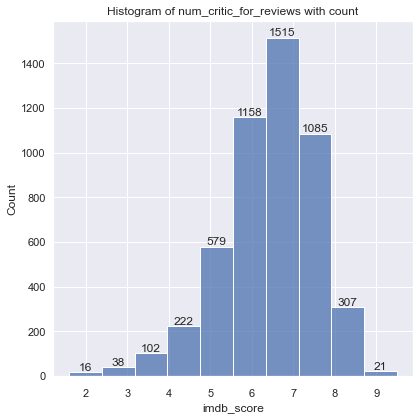

In [443]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.histplot(x=movie_metadata_1['imdb_score'], palette='rocket', bins=10)
ax.set(title='Histogram of num_critic_for_reviews with count')
ax.tick_params(axis='y', length=0)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>]],
      dtype=object)

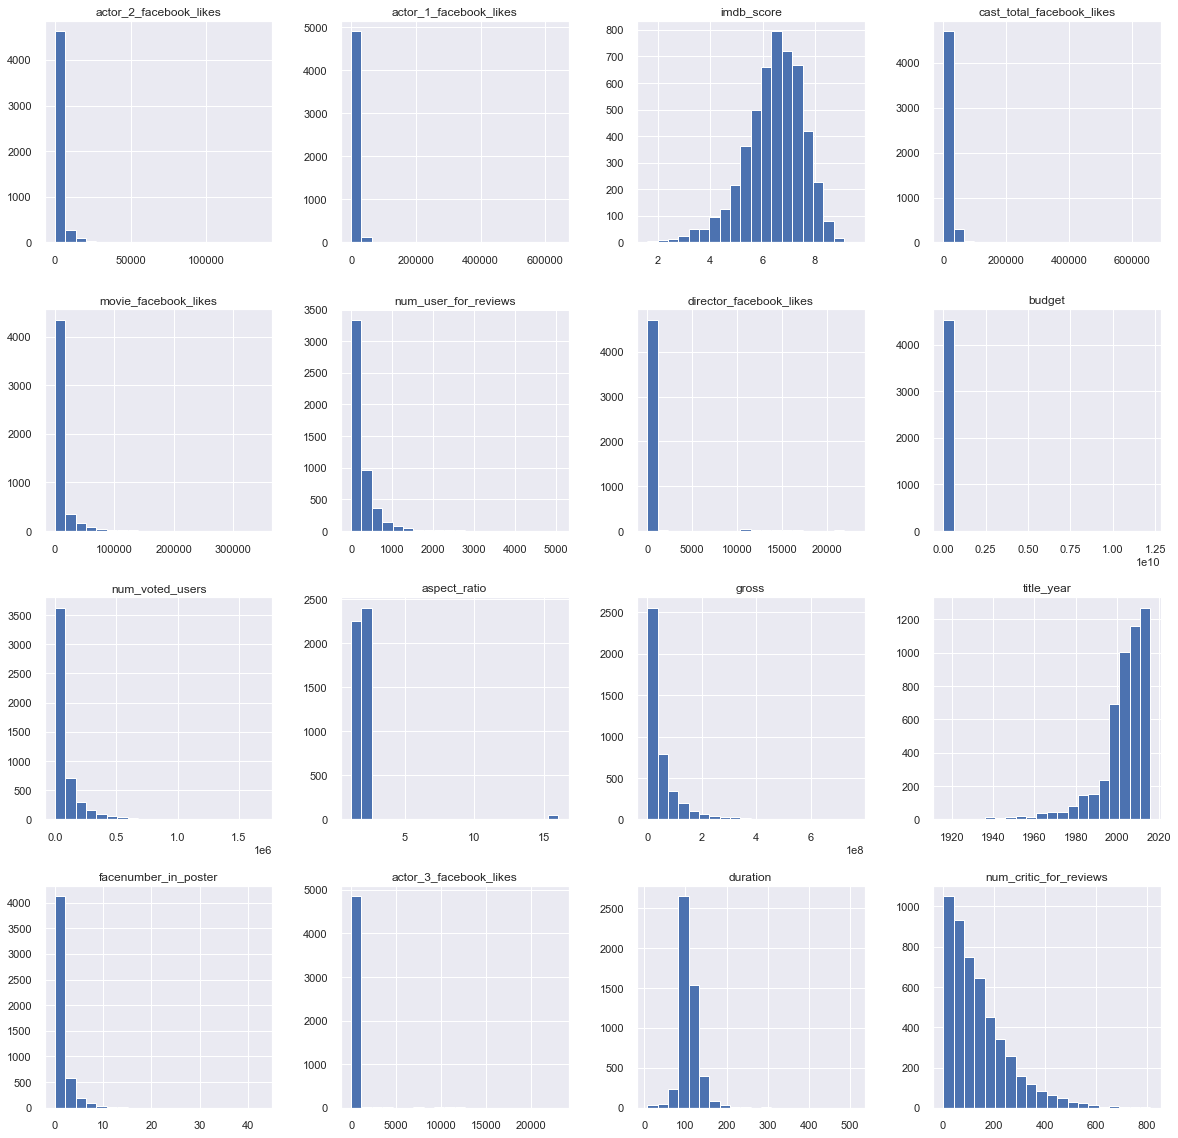

In [444]:
sns.set(rc={'figure.figsize':(20,20)})
df_nums.hist(bins=20)

In [445]:
movie_metadata_1.skew().sort_values()

title_year                   -2.292273
imdb_score                   -0.741471
num_critic_for_reviews        1.516533
duration                      2.339134
gross                         3.127204
num_voted_users               4.029871
num_user_for_reviews          4.121475
facenumber_in_poster          4.384766
movie_facebook_likes          5.058927
director_facebook_likes       5.229701
actor_3_facebook_likes        7.279021
aspect_ratio                  9.390056
actor_2_facebook_likes        9.884733
cast_total_facebook_likes    12.831928
actor_1_facebook_likes       19.121776
budget                       48.157435
dtype: float64

In [446]:
# movie_metadata_1 = movie_metadata_1.columns[movie_metadata_1.isnull().any()]

In [447]:
# movie_metadata_1=movie_metadata_1.drop([
#   'movie_title',
#   'actor_2_name',
#   # 'genres',
#   'actor_3_name',
#   'actor_1_name',
#   # 'plot_keywords',
#   'movie_imdb_link',
#   'aspect_ratio'
# ], axis=1)

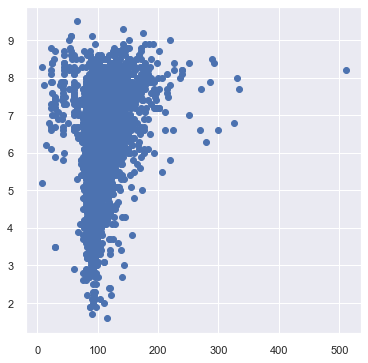

In [448]:
sns.set(rc={'figure.figsize':(6,6)})
plt.scatter(movie_metadata_1['duration'], movie_metadata_1['imdb_score'] )

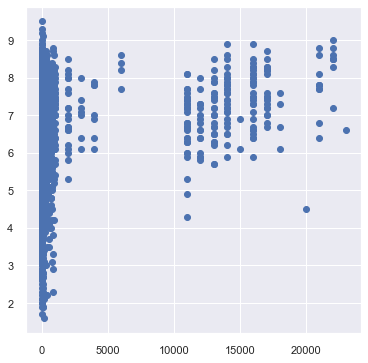

In [449]:
plt.scatter(movie_metadata_1['director_facebook_likes'], movie_metadata_1['imdb_score'] )

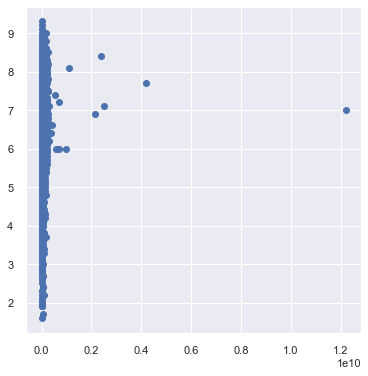

In [450]:
plt.scatter(movie_metadata_1['budget'], movie_metadata_1['imdb_score'] )

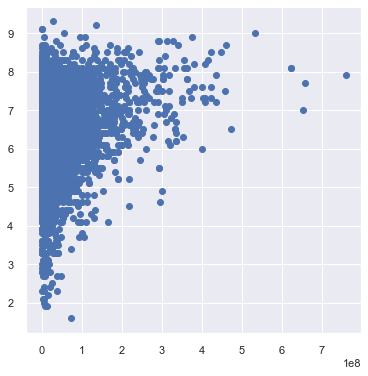

In [451]:
plt.scatter(movie_metadata_1['gross'], movie_metadata_1['imdb_score'] )

### Preprocess the Data

##### Encode imdb_score as high or low imdb score (binary values)

In [452]:
percentile45 = movie_metadata_1['imdb_score'].quantile(0.45)
percentile55 = movie_metadata_1['imdb_score'].quantile(0.55)
print(percentile45, percentile55)

6.4 6.7


In [453]:
movie_metadata_1 = movie_metadata_1.drop(movie_metadata_1[(movie_metadata_1['imdb_score'] > percentile45) & (movie_metadata_1['imdb_score'] < percentile55)].index)

In [454]:
movie_metadata_1

,actor_2_facebook_likes,actor_1_facebook_likes,imdb_score,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,director_facebook_likes,budget,num_voted_users,aspect_ratio,gross,title_year,facenumber_in_poster,actor_3_facebook_likes,duration,num_critic_for_reviews
0,936.0,1000.0,7.9,4834,33000,3054.0,0.0,237000000.0,886204,1.78,760505847.0,2009.0,0.0,855.0,178.0,723.0
1,5000.0,40000.0,7.1,48350,0,1238.0,563.0,300000000.0,471220,2.35,309404152.0,2007.0,0.0,1000.0,169.0,302.0
2,393.0,11000.0,6.8,11700,85000,994.0,0.0,245000000.0,275868,2.35,200074175.0,2015.0,1.0,161.0,148.0,602.0
3,23000.0,27000.0,8.5,106759,164000,2701.0,22000.0,250000000.0,1144337,2.35,448130642.0,2012.0,0.0,23000.0,164.0,813.0
4,12.0,131.0,7.1,143,0,NaN,131.0,NaN,8,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,205.0,296.0,6.4,690,413,14.0,0.0,9000.0,1338,NaN,4584.0,2011.0,1.0,133.0,95.0,14.0
5038,470.0,637.0,7.7,2283,84,6.0,2.0,NaN,629,NaN,NaN,2013.0,2.0,318.0,87.0,1.0
5039,593.0,841.0,7.5,1753,32000,359.0,NaN,NaN,73839,16.00,NaN,NaN,1.0,319.0,43.0,43.0
5040,0.0,0.0,6.3,0,16,3.0,0.0,1400.0,38,NaN,NaN,2013.0,0.0,0.0,76.0,13.0


<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

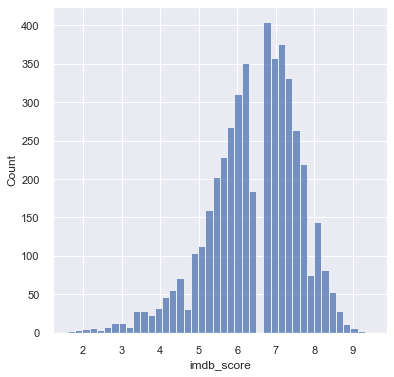

In [455]:
sns.histplot(movie_metadata_1['imdb_score'])

In [456]:
movie_metadata_1['high_imdb_score'] = np.where(movie_metadata_1['imdb_score'] >= percentile55 , 1, 0)
movie_metadata_1

,actor_2_facebook_likes,actor_1_facebook_likes,imdb_score,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,director_facebook_likes,budget,num_voted_users,aspect_ratio,gross,title_year,facenumber_in_poster,actor_3_facebook_likes,duration,num_critic_for_reviews,high_imdb_score
0,936.0,1000.0,7.9,4834,33000,3054.0,0.0,237000000.0,886204,1.78,760505847.0,2009.0,0.0,855.0,178.0,723.0,1
1,5000.0,40000.0,7.1,48350,0,1238.0,563.0,300000000.0,471220,2.35,309404152.0,2007.0,0.0,1000.0,169.0,302.0,1
2,393.0,11000.0,6.8,11700,85000,994.0,0.0,245000000.0,275868,2.35,200074175.0,2015.0,1.0,161.0,148.0,602.0,1
3,23000.0,27000.0,8.5,106759,164000,2701.0,22000.0,250000000.0,1144337,2.35,448130642.0,2012.0,0.0,23000.0,164.0,813.0,1
4,12.0,131.0,7.1,143,0,NaN,131.0,NaN,8,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,205.0,296.0,6.4,690,413,14.0,0.0,9000.0,1338,NaN,4584.0,2011.0,1.0,133.0,95.0,14.0,0
5038,470.0,637.0,7.7,2283,84,6.0,2.0,NaN,629,NaN,NaN,2013.0,2.0,318.0,87.0,1.0,1
5039,593.0,841.0,7.5,1753,32000,359.0,NaN,NaN,73839,16.00,NaN,NaN,1.0,319.0,43.0,43.0,1
5040,0.0,0.0,6.3,0,16,3.0,0.0,1400.0,38,NaN,NaN,2013.0,0.0,0.0,76.0,13.0,0


In [457]:
movie_target_names = ['low_score', 'high_score']
movie_target_names

['low_score', 'high_score']

In [458]:
movie_score_target = pd.DataFrame(movie_metadata_1['high_imdb_score'])
movie_score_target


,high_imdb_score
0,1
1,1
2,1
3,1
4,1
...,...
5037,0
5038,1
5039,1
5040,0


In [459]:
movie_metadata_1=movie_metadata_1.dropna(subset=['imdb_score'],axis=0)

In [460]:
movie_metadata_1.shape

(4656, 17)

In [461]:
x=movie_metadata_1.drop(['imdb_score', 'high_imdb_score'],axis=1)

y=movie_metadata_1['high_imdb_score'].to_numpy()

##### Split train-test

In [462]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
  x,
  movie_score_target,
  test_size=0.3,
  shuffle=True,
  stratify=movie_score_target,
  random_state=30
)

##### Standardize features (comparable units) in train dataset

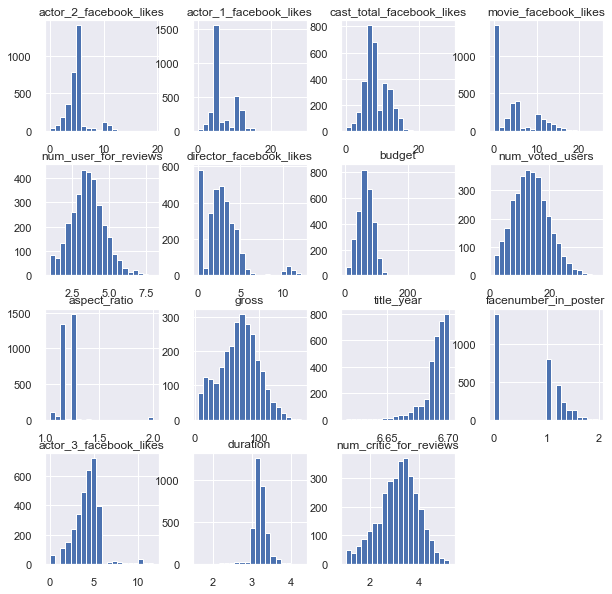

In [463]:
sns.set(rc={'figure.figsize':(10,10)})

x_train=np.sqrt(np.sqrt(x_train))
x_train.hist(bins=20)

x_test=np.sqrt(np.sqrt(x_test))

##### Fill missing values

In [464]:
x_train.isna().sum()

actor_2_facebook_likes         9
actor_1_facebook_likes         3
cast_total_facebook_likes      0
movie_facebook_likes           0
num_user_for_reviews          17
director_facebook_likes       76
budget                       332
num_voted_users                0
aspect_ratio                 224
gross                        607
title_year                    78
facenumber_in_poster          11
actor_3_facebook_likes        14
duration                      11
num_critic_for_reviews        36
dtype: int64

In [465]:
imputer=impute.SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(x_train)
x_train=pd.DataFrame(imputer.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(imputer.transform(x_test),columns=x_test.columns)

In [466]:
x_train.isna().sum()

actor_2_facebook_likes       0
actor_1_facebook_likes       0
cast_total_facebook_likes    0
movie_facebook_likes         0
num_user_for_reviews         0
director_facebook_likes      0
budget                       0
num_voted_users              0
aspect_ratio                 0
gross                        0
title_year                   0
facenumber_in_poster         0
actor_3_facebook_likes       0
duration                     0
num_critic_for_reviews       0
dtype: int64

##### Select features in train dataset
- Only numerical features
- Correlation – use correlation matrix or heat map to ignore x which is highly correlated with another x

In [467]:
# TODO: Identify and remove high-correlated columns
# sns.pairplot(data=x_train)

<AxesSubplot:>

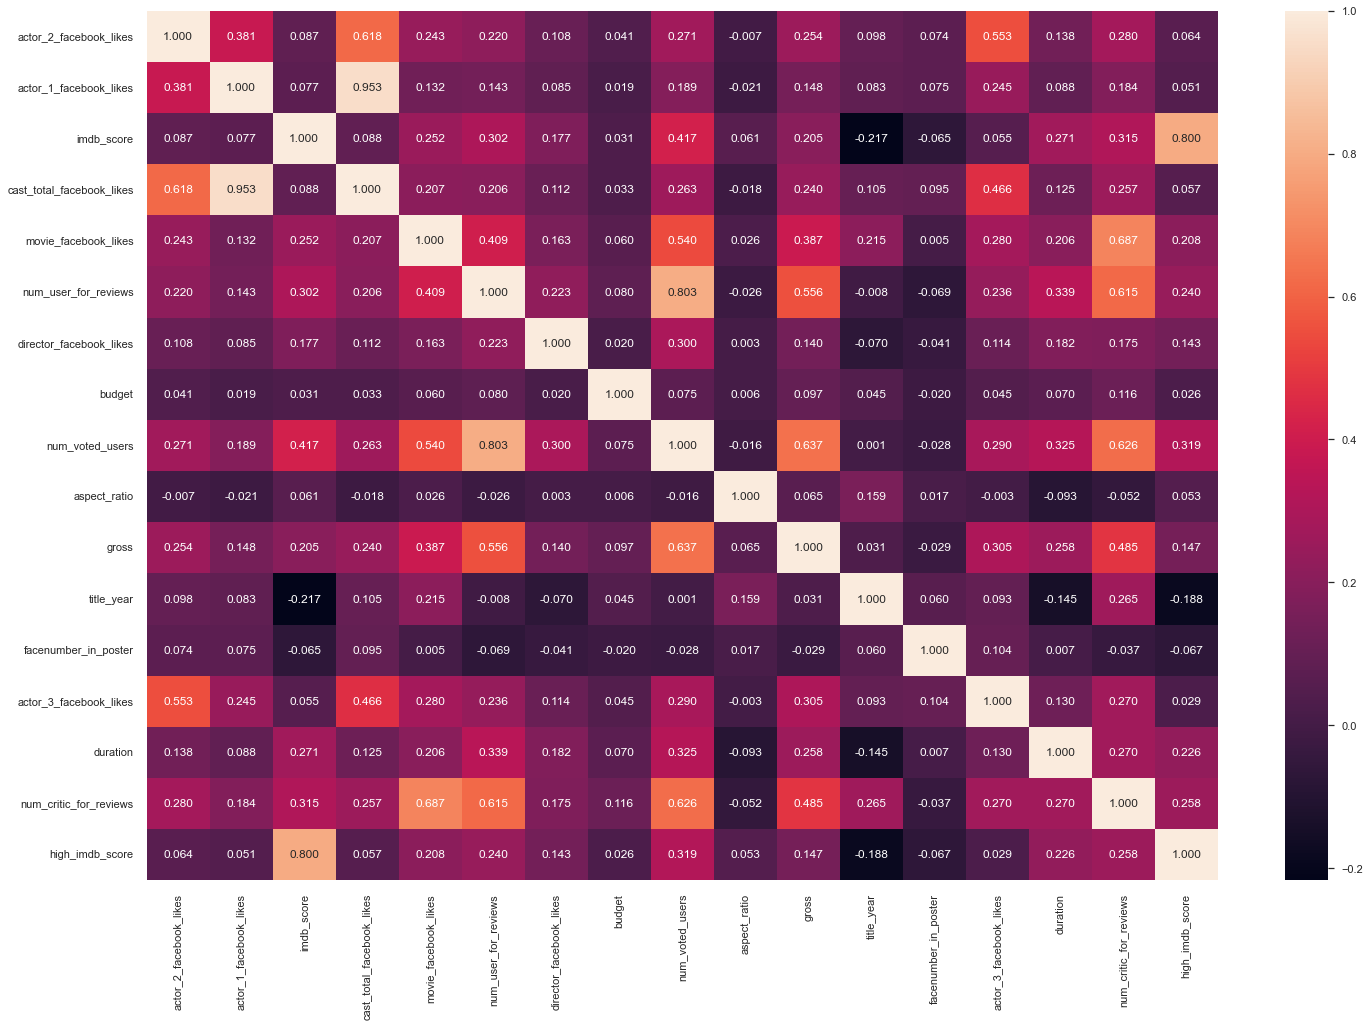

In [468]:
sns.set(rc={'figure.figsize':(24,16)})
sns.heatmap(movie_metadata_1.corr().round(3), annot=True, fmt=".3f")

Drop the columns where the corrrelation is over 0.5

num_user_forReviews 0.24
- num_voted_users 0.319 **
- gross 0.147
- num_critic_for_reviews 0.258

cast facebook likes
- drop all 
- use only cast_total_facebook_likes

num_voted_users 0.319 **
- num_user_for_reviews 0.24
- num_critic_for_reviews 0.258
- gross 0.147


Columns to drop: 
- gross
- num_user_for_reviews
- num_critic_for_reviews
- actor likes 1, 2, 3


In [469]:
x_train=x_train.drop(['gross', 'num_user_for_reviews', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'num_critic_for_reviews'],axis=1)
x_test=x_test.drop(['gross', 'num_user_for_reviews', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'num_critic_for_reviews'],axis=1)
x=x.drop(['gross', 'num_user_for_reviews', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'num_critic_for_reviews'],axis=1)
# x_train_original = x_train.copy()

### Model the Data

##### Preprocess (based on train dataset) and predict test datase

In [470]:
x_train.sort_index().head()

,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,budget,num_voted_users,aspect_ratio,title_year,facenumber_in_poster,duration
0,6.671464,0.000000,3.717563,37.606031,13.935599,1.166253,6.693247,1.000000,3.223710
1,10.883008,5.045378,2.530440,93.060486,13.300311,1.238132,6.689909,1.189207,3.281818
2,7.111033,3.779267,4.049842,69.992710,8.584598,1.238132,6.688239,1.189207,3.062814
3,10.966223,0.000000,2.482824,50.492670,13.117536,1.238132,6.694914,0.000000,3.201086
4,13.029033,10.000000,5.058949,52.331757,25.371172,1.166253,6.693247,0.000000,3.130169


In [471]:
y_train.sort_index()

,high_imdb_score
0,1
1,1
2,1
6,0
7,1
...,...
5036,1
5037,0
5038,1
5039,1


In [472]:
x_train.value_counts()

cast_total_facebook_likes  movie_facebook_likes  director_facebook_likes  budget      num_voted_users  aspect_ratio  title_year  facenumber_in_poster  duration
7.440594                   3.829214              2.710806                 70.710678   10.289898        1.166253      6.689074    1.000000              3.036370    2
8.137526                   0.000000              1.934336                 66.021958   8.810271         1.238132      6.699075    1.189207              3.223710    2
6.161210                   0.000000              5.178241                 89.790076   22.139193        1.166253      6.679028    0.000000              3.260390    2
6.961046                   11.418583             2.340347                 61.169088   14.737173        1.238132      6.697412    0.000000              3.097041    2
5.959074                   14.229707             3.363586                 104.663514  18.231685        1.238132      6.699907    1.316074              3.162278    2
               

In [474]:
x_test.value_counts()

cast_total_facebook_likes  movie_facebook_likes  director_facebook_likes  budget     num_voted_users  aspect_ratio  title_year  facenumber_in_poster  duration
5.880751                   0.000000              4.963605                 36.628415  16.946573        1.166253      6.663028    0.000000              3.193437    2
6.822046                   4.763781              2.590020                 66.021958  6.186705         1.073898      6.685731    1.000000              3.154342    2
10.652345                  10.241137             3.295873                 79.527073  13.006481        1.238132      6.699907    1.189207              3.238532    2
8.701148                   11.582922             4.840532                 50.492670  24.514758        1.238132      6.690744    0.000000              3.274722    2
7.097087                   0.000000              0.000000                 70.710678  11.318367        1.238132      6.695747    1.189207              3.216221    2
                     

In [475]:
y_train.value_counts()

high_imdb_score
1                  1649
0                  1610
dtype: int64

In [476]:
y_test.value_counts()

high_imdb_score
1                  707
0                  690
dtype: int64

array([[<AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'title_year'}>,
        <AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

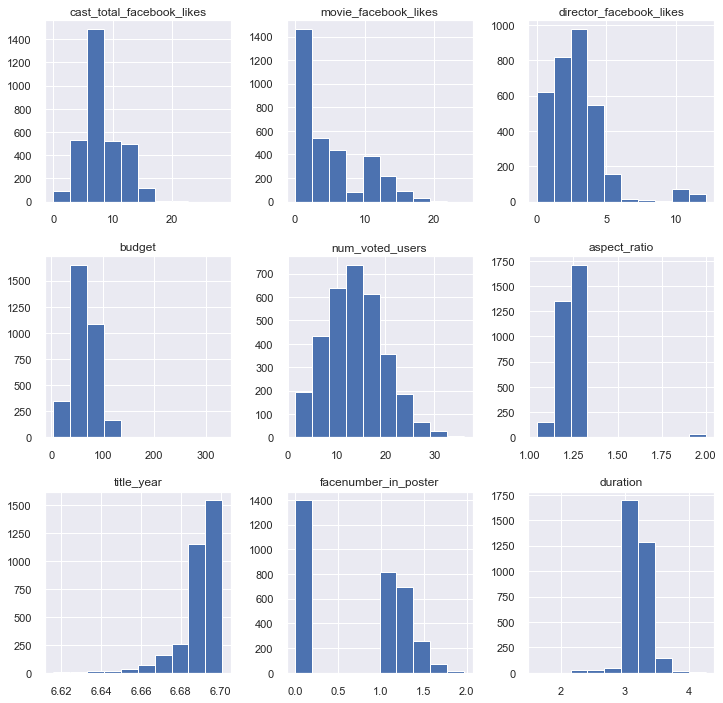

In [477]:
sns.set(rc={'figure.figsize':(12,12)})
x_train.hist()

##### Scale the data

In [478]:
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_train

array([[-0.47747808, -0.88516669,  0.4173418 , ...,  0.38014245,
         0.53151615,  0.13256978],
       [ 0.83677041,  0.1127603 , -0.1200487 , ...,  0.06356267,
         0.84326264,  0.43957619],
       [-0.34030673, -0.13766435,  0.56775875, ..., -0.09490507,
         0.84326264, -0.71749804],
       ...,
       [-0.33039324, -0.88516669,  0.18354142, ...,  0.69624938,
         0.53151615, -0.31873858],
       [-0.1458716 ,  0.11886411, -0.17242552, ..., -0.09490507,
         0.53151615, -0.27616905],
       [-0.22823936, -0.88516669, -0.50421653, ...,  0.14275203,
         0.84326264, -0.71749804]])

In [479]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_train.head()

,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,budget,num_voted_users,aspect_ratio,title_year,facenumber_in_poster,duration
0,-0.477478,-0.885167,0.417342,-1.213572,0.017578,-0.470590,0.380142,0.531516,0.132570
1,0.836770,0.112760,-0.120049,1.176396,-0.090454,0.311446,0.063563,0.843263,0.439576
2,-0.340307,-0.137664,0.567759,0.182224,-0.892372,0.311446,-0.094905,0.843263,-0.717498
3,0.862739,-0.885167,-0.141604,-0.658186,-0.121535,0.311446,0.538255,-1.116131,0.013040
4,1.506456,1.092736,1.024564,-0.578925,1.962224,-0.470590,0.380142,-1.116131,-0.361639


In [480]:
movie_train=x_train.copy()
movie_train['high_imdb_score']=y_train['high_imdb_score'].to_numpy()

In [481]:
movie_train.head()

,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,budget,num_voted_users,aspect_ratio,title_year,facenumber_in_poster,duration,high_imdb_score
0,-0.477478,-0.885167,0.417342,-1.213572,0.017578,-0.470590,0.380142,0.531516,0.132570,1
1,0.836770,0.112760,-0.120049,1.176396,-0.090454,0.311446,0.063563,0.843263,0.439576,0
2,-0.340307,-0.137664,0.567759,0.182224,-0.892372,0.311446,-0.094905,0.843263,-0.717498,0
3,0.862739,-0.885167,-0.141604,-0.658186,-0.121535,0.311446,0.538255,-1.116131,0.013040,1
4,1.506456,1.092736,1.024564,-0.578925,1.962224,-0.470590,0.380142,-1.116131,-0.361639,1


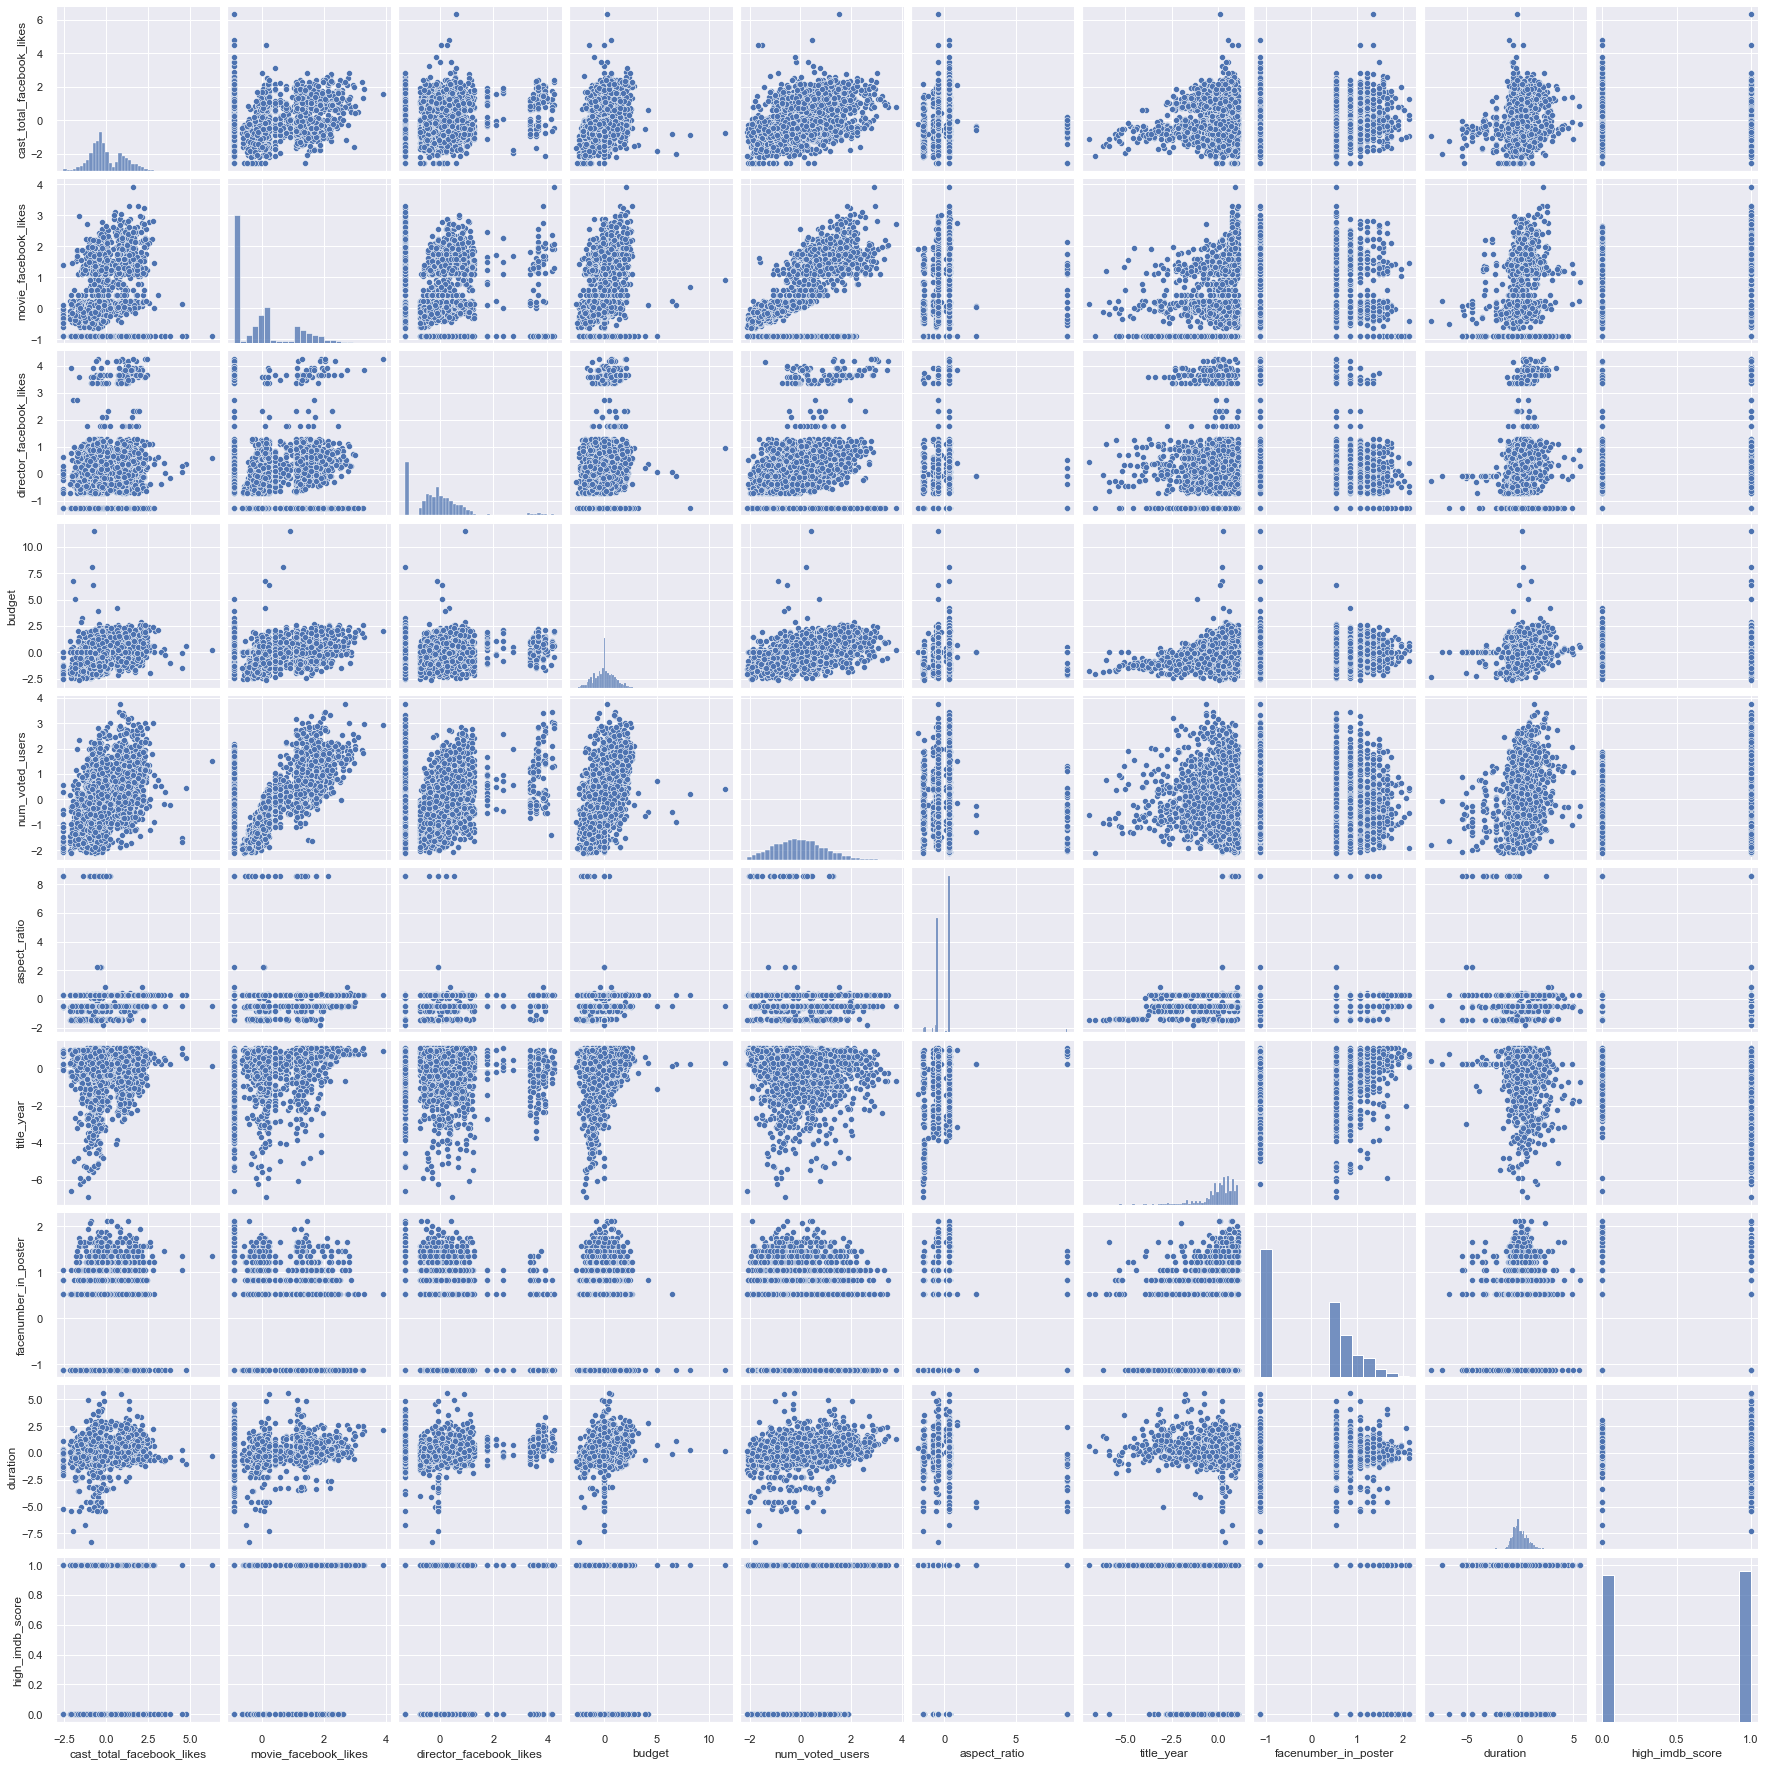

In [482]:
sns.pairplot(data=movie_train)

<AxesSubplot:>

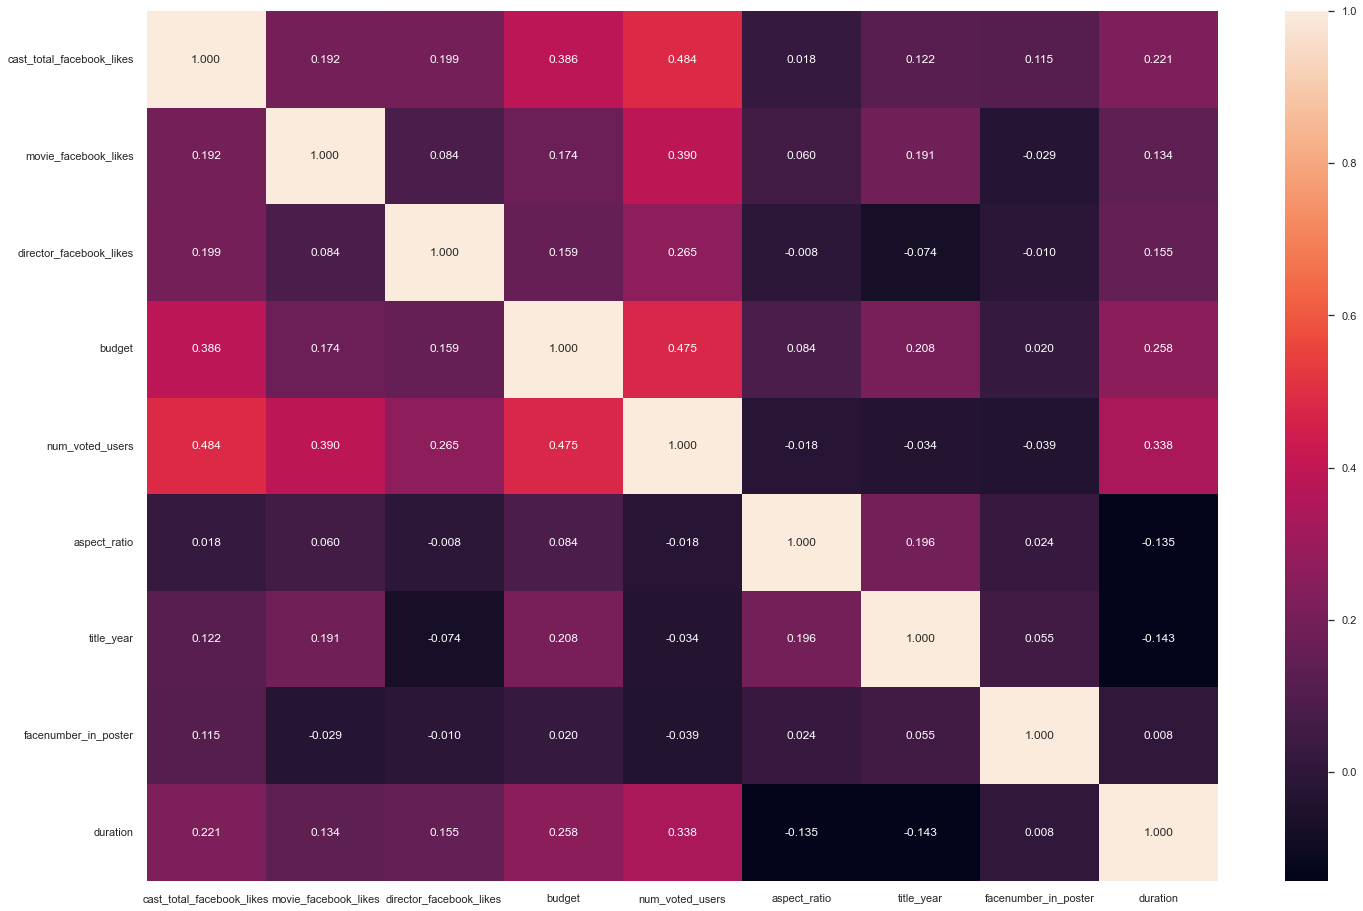

In [483]:
sns.set(rc={'figure.figsize':(24,16)})
sns.heatmap(x_train.corr().round(3), annot=True, fmt=".3f")

In [484]:
x_test.columns

Index(['cast_total_facebook_likes', 'movie_facebook_likes',
       'director_facebook_likes', 'budget', 'num_voted_users', 'aspect_ratio',
       'title_year', 'facenumber_in_poster', 'duration'],
      dtype='object')

In [485]:
x_train

,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,budget,num_voted_users,aspect_ratio,title_year,facenumber_in_poster,duration
0,-0.477478,-0.885167,0.417342,-1.213572,0.017578,-0.470590,0.380142,0.531516,0.132570
1,0.836770,0.112760,-0.120049,1.176396,-0.090454,0.311446,0.063563,0.843263,0.439576
2,-0.340307,-0.137664,0.567759,0.182224,-0.892372,0.311446,-0.094905,0.843263,-0.717498
3,0.862739,-0.885167,-0.141604,-0.658186,-0.121535,0.311446,0.538255,-1.116131,0.013040
4,1.506456,1.092736,1.024564,-0.578925,1.962224,-0.470590,0.380142,-1.116131,-0.361639
...,...,...,...,...,...,...,...,...,...
3254,2.388354,0.227090,-0.625345,0.150299,-0.325820,-0.470590,-0.491595,0.843263,-0.276169
3255,-0.427301,-0.885167,0.898238,-1.326044,-1.097573,-0.470590,0.301042,-1.116131,-1.098516
3256,-0.330393,-0.885167,0.183541,-0.410741,-0.671538,-0.470590,0.696249,0.531516,-0.318739
3257,-0.145872,0.118864,-0.172426,-0.152190,-0.311722,0.311446,-0.094905,0.531516,-0.276169


In [486]:
x_train.isna().sum()

cast_total_facebook_likes    0
movie_facebook_likes         0
director_facebook_likes      0
budget                       0
num_voted_users              0
aspect_ratio                 0
title_year                   0
facenumber_in_poster         0
duration                     0
dtype: int64

In [487]:
x_train.corr()

,cast_total_facebook_likes,movie_facebook_likes,director_facebook_likes,budget,num_voted_users,aspect_ratio,title_year,facenumber_in_poster,duration
cast_total_facebook_likes,1.000000,0.192062,0.199371,0.385712,0.484100,0.018147,0.122456,0.115170,0.221152
movie_facebook_likes,0.192062,1.000000,0.083898,0.173890,0.390351,0.060422,0.191379,-0.029049,0.133738
director_facebook_likes,0.199371,0.083898,1.000000,0.159105,0.265211,-0.007625,-0.073724,-0.009927,0.154513
budget,0.385712,0.173890,0.159105,1.000000,0.474881,0.083544,0.207991,0.019627,0.257731
num_voted_users,0.484100,0.390351,0.265211,0.474881,1.000000,-0.018468,-0.034437,-0.038513,0.338421
aspect_ratio,0.018147,0.060422,-0.007625,0.083544,-0.018468,1.000000,0.195552,0.024355,-0.135126
title_year,0.122456,0.191379,-0.073724,0.207991,-0.034437,0.195552,1.000000,0.054852,-0.142950
facenumber_in_poster,0.115170,-0.029049,-0.009927,0.019627,-0.038513,0.024355,0.054852,1.000000,0.008094
duration,0.221152,0.133738,0.154513,0.257731,0.338421,-0.135126,-0.142950,0.008094,1.000000


In [488]:
x_test=scaler.transform(x_test)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [489]:
x_test.isna().sum()

cast_total_facebook_likes    0
movie_facebook_likes         0
director_facebook_likes      0
budget                       0
num_voted_users              0
aspect_ratio                 0
title_year                   0
facenumber_in_poster         0
duration                     0
dtype: int64

In [490]:
#Create logistic regression 
logr =LogisticRegression()

#Train the model using the training sets
logr.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = logr.predict(x_test)

In [491]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### Evaluate classification result of test dataset

Classification Report: 
               precision    recall  f1-score   support

   low_score       0.71      0.76      0.73       690
  high_score       0.75      0.70      0.72       707

    accuracy                           0.73      1397
   macro avg       0.73      0.73      0.73      1397
weighted avg       0.73      0.73      0.73      1397
 

Accuracy on train:   0.733 

Accuracy on test:  0.727 



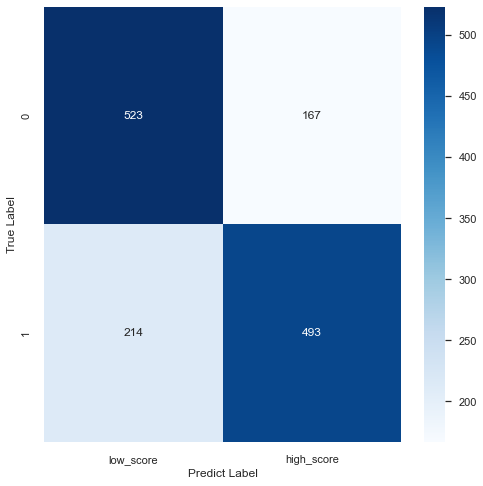

In [492]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

sns.set(rc={'figure.figsize':(8,8)})

# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=movie_target_names),'\n')
print("Accuracy on train:  ",logr.score(x_train,y_train).round(3),'\n')
print("Accuracy on test: ",logr.score(x_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred,).round(3)
sns.heatmap(cf,annot=True,cmap='Blues', xticklabels=movie_target_names, fmt='.3g')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

##### Interpret the Logistic Regression function

In [493]:
logr.intercept_

array([0.07536737])

In [494]:
logr.coef_

array([[-0.30044121,  0.18106262,  0.13336424, -0.6815132 ,  1.12111206,
         0.25384702, -0.3098706 , -0.09791897,  0.36281302]])

In [495]:
np.exp(logr.coef_)
# explain what these expected coefficients mean

array([[0.74049144, 1.19849023, 1.14266612, 0.50585096, 3.0682644 ,
        1.28897461, 0.73354187, 0.90672237, 1.43736708]])

In [496]:
pred_prob = pd.DataFrame(logr.predict_proba(x_test))

In [497]:
# metrics.roc_auc_score(y_test,pred_prob,multi_class='ovr')

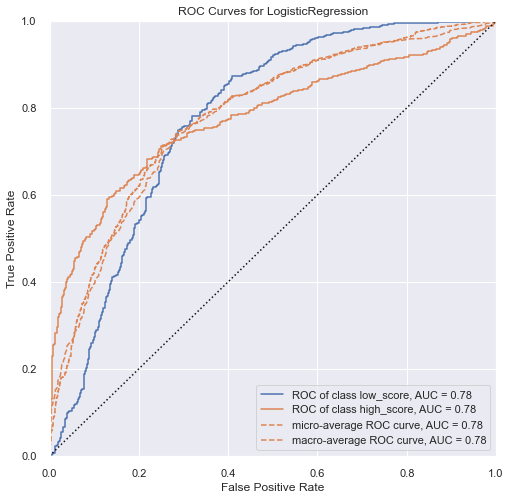

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [498]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(logr, classes=movie_target_names)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

In [499]:
log_odds = logr.coef_[0]

pd.DataFrame(log_odds, x_test.columns, columns=[
             'coef']).sort_values(by='coef', ascending=False)


,coef
num_voted_users,1.121112
duration,0.362813
aspect_ratio,0.253847
movie_facebook_likes,0.181063
director_facebook_likes,0.133364
facenumber_in_poster,-0.097919
cast_total_facebook_likes,-0.300441
title_year,-0.309871
budget,-0.681513


In [500]:
odds = np.exp(logr.coef_[0])

pd.DataFrame(odds, x_test.columns, columns=[
             'coef']).sort_values(by='coef', ascending=False)

,coef
num_voted_users,3.068264
duration,1.437367
aspect_ratio,1.288975
movie_facebook_likes,1.198490
director_facebook_likes,1.142666
facenumber_in_poster,0.906722
cast_total_facebook_likes,0.740491
title_year,0.733542
budget,0.505851


##### Interpretation of Logistic Regression Result

In [501]:
# Pseudo R^2

1- ((707 * math.log(707/1397)) / (690 * math.log(690/1397)))

0.010716803000539343

---

---

---